In [1]:
!pip install diffusers==0.10.2 transformers scipy ftfy accelerate

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 503.1/503.1 kB 9.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 60.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 kB 40.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 62.4 MB/s eta 0:00:00:00:01


In [2]:
from diffusers import StableDiffusionPipeline
import torch
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe.to("cuda")
generator = torch.Generator("cuda").manual_seed(42)

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/pytorch_p39/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


  0%|          | 0/50 [00:00<?, ?it/s]

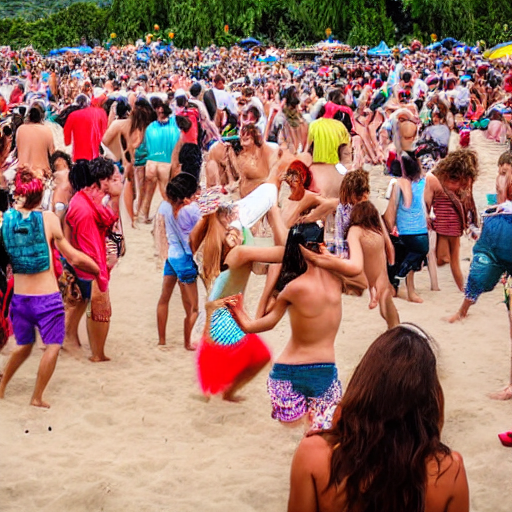

In [30]:
p="a person in a crowded beach party with lots of dancing"
pipe(p, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

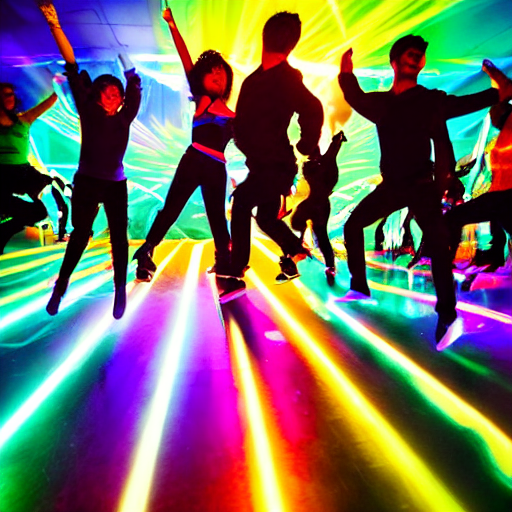

In [5]:
pipe("high-contrast, vibrant color palette and bright flashy lighting that captures the energy and excitement of a 24-hour party, with lots of people dancing or jumping, dynamic asymmetrical composition slightly blurred or out-of-focus background elements", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

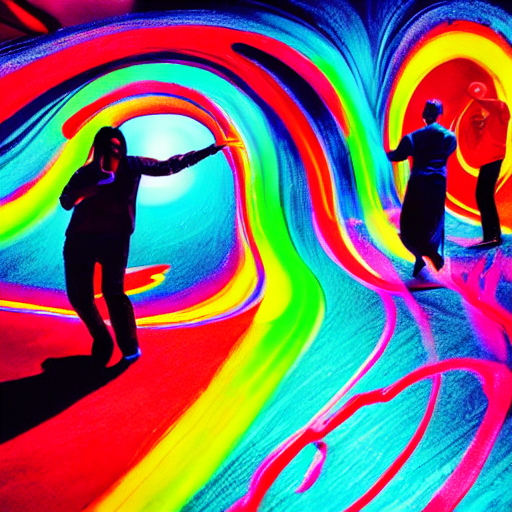

In [9]:
p="people dancing, bold, saturated color palette and bright, pulsating lighting with people moving dynamic and flowing composition with curved or swirling lines and shapes,mood of blissful, carefree abandon"
pipe(p, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

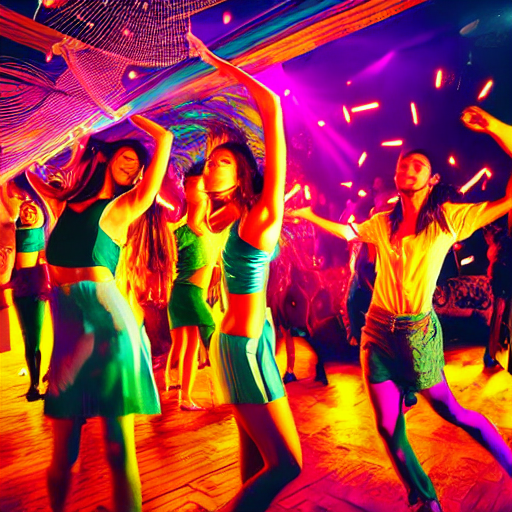

In [10]:
p="nightclub with people dancing, bold, saturated color palette and bright, pulsating lighting with people moving dynamic and flowing composition with curved or swirling lines and shapes,mood of blissful, carefree abandon"
pipe(p, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

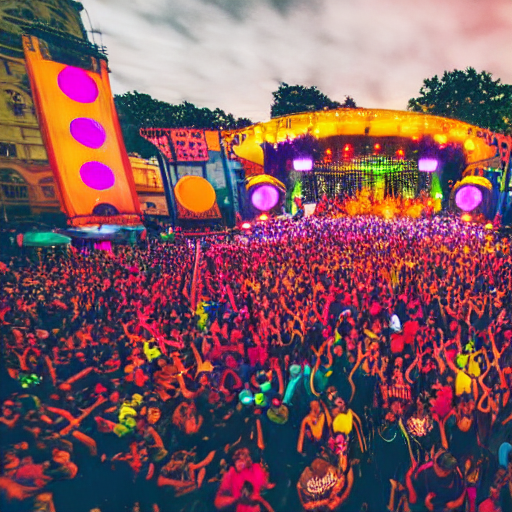

In [12]:
p="Music festival with multiple stages, bold saturated colours, large crowd of people dancing, flowing composition,  colourful lights, blurry background"
pipe(p, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

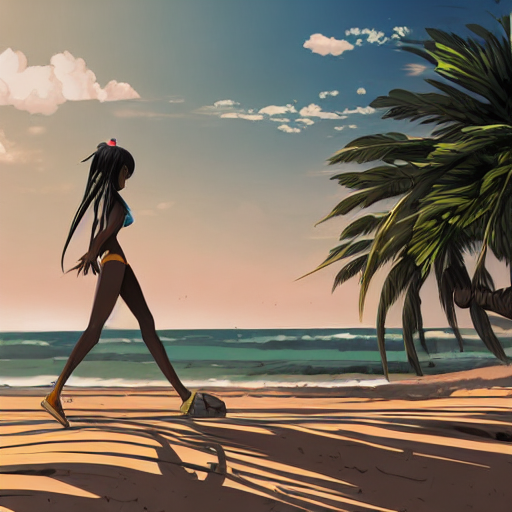

In [4]:

# prompt = "a photograph of an astronaut riding a horse"
prompt = "Futuristic beach with dark skinned girl walking anime style long shot"

pipe(prompt, guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

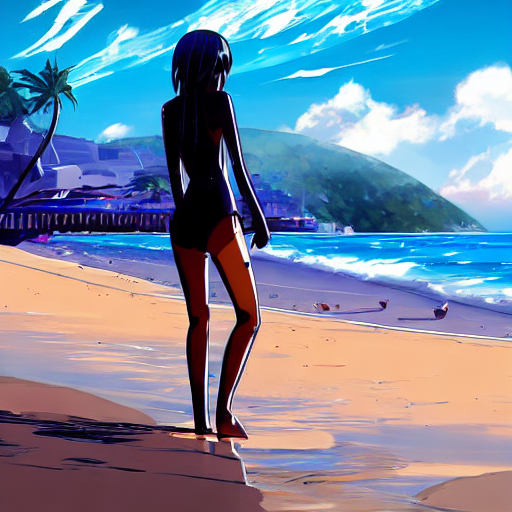

In [41]:
pipe("futuristic beach, sea, sand, long shot, anime", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

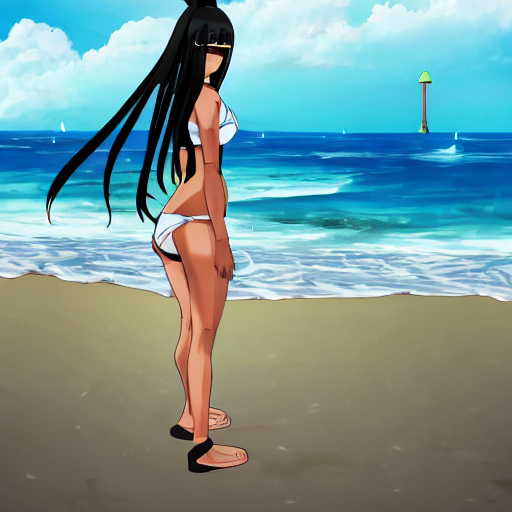

In [42]:
pipe("futuristic beach, sea, sand dark skinned woman with straight braided black hair far away, anime style", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

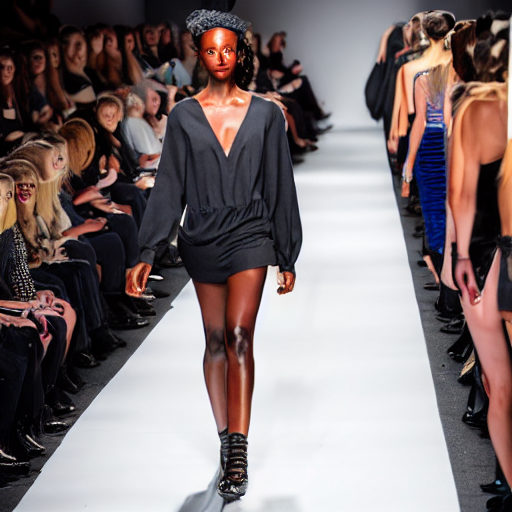

In [11]:
pipe("photograph of fashion runway with one dark skinned female model long shot", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

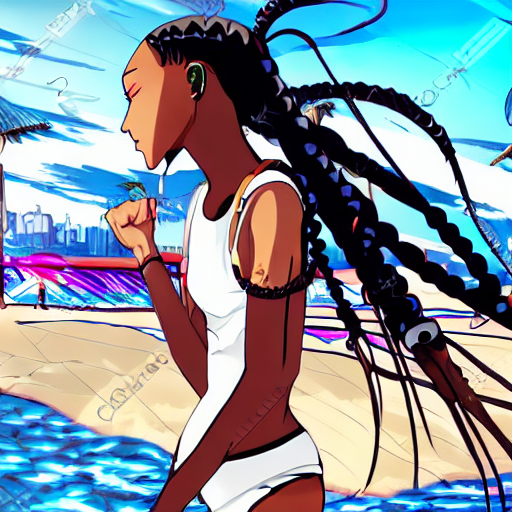

In [30]:
pipe("anime style futuristic beach with dark skinned girl with braided black hair walking with graffiti long shot", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

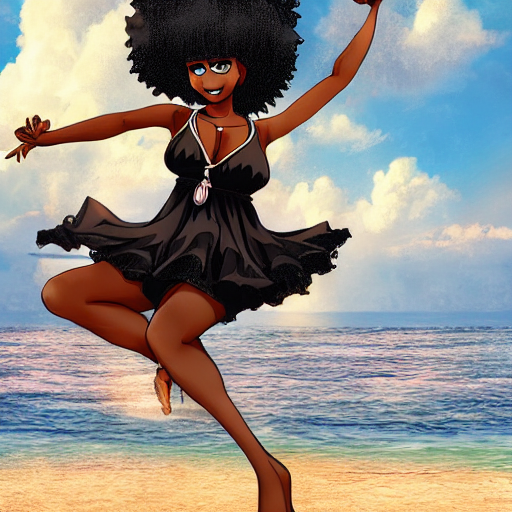

In [44]:
pipe("anime style image of dark skinned woman with braided black hair dancing on the beach long shot", guidance_scale=7.5, generator=generator).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

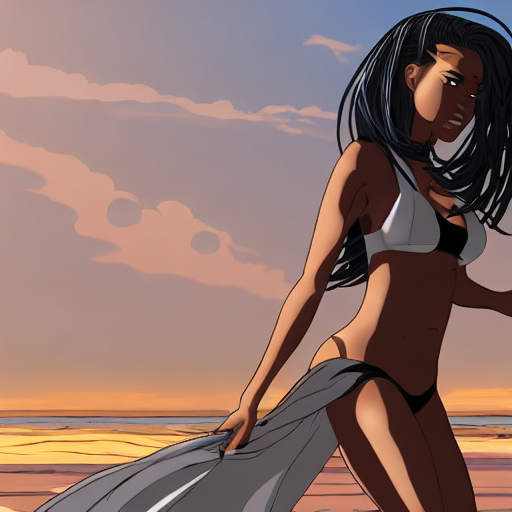

In [4]:
pipe("dark skinned woman with braided black hair walking on the beach anime style futuristic", guidance_scale=7.5, generator=generator).images[0]

In [36]:
import re
class Frame():
    def __init__(self, subject, action, environment, point_of_view,obj='', art_style='', descriptors=''):
        self.subject = subject
        self.action = action
        self.object = obj
        self.environment = environment
        self.point_of_view = point_of_view
        self.art_style = art_style
        self.descriptors = descriptors
        self.prompts = []
    def get_prompt_combinations(self):
        self.prompts.append(re.sub("\s\s+" , " ", f"A {self.point_of_view} photograph of {self.subject} {self.action} {self.environment} {self.art_style} {self.descriptors}"))
        self.prompts.append(re.sub("\s\s+" , " ", f"A {self.point_of_view} photograph of {self.subject} {self.environment} {self.action}  {self.art_style} {self.descriptors}"))


In [56]:
frame = Frame(subject='an astronaut', action='riding a horse',environment='', art_style='', point_of_view='',descriptors='24mm lens, long shot')

In [57]:
frame.get_prompt_combinations()

In [58]:
frame.prompts

['A photograph of an astronaut riding a horse 24mm lens, long shot',
 'A photograph of an astronaut riding a horse 24mm lens, long shot']

In [59]:
images=[]
for prompt in frame.prompts:
    # images.append(pipe(prompt, guidance_scale=7.5, generator=generator).images[0])
    images.append(pipe(prompt).images[0])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

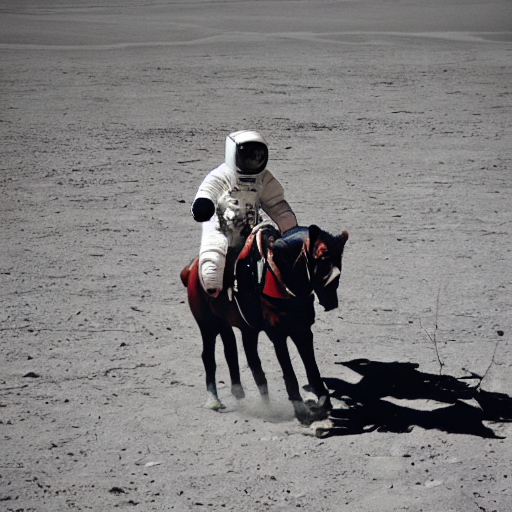

In [60]:
images[0]

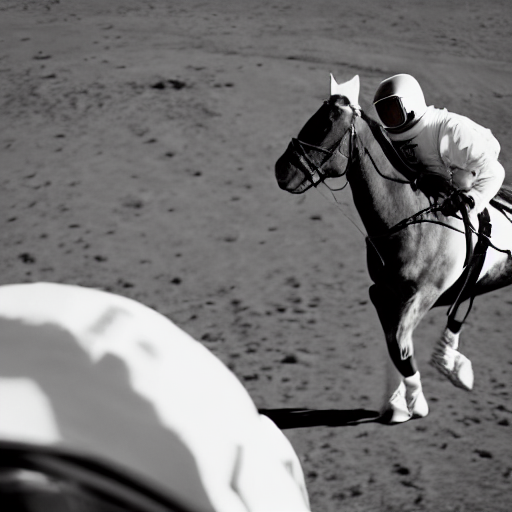

In [61]:
images[1]

In [62]:
frames=[
    Frame(subject='snowy covered alp, high mountain peak with top station cabin',action='', environment='sunlight, outdoor', art_style='', point_of_view='',descriptors='24mm lens, long shot')
    
]

In [66]:
for frame in frames:
    frame.get_prompt_combinations()

In [67]:
frames[0].prompts

['A photograph of snowy covered alp, high mountain peak with top station cabin sunlight, outdoor 24mm lens, long shot',
 'A photograph of snowy covered alp, high mountain peak with top station cabin sunlight, outdoor 24mm lens, long shot']

  0%|          | 0/50 [00:00<?, ?it/s]

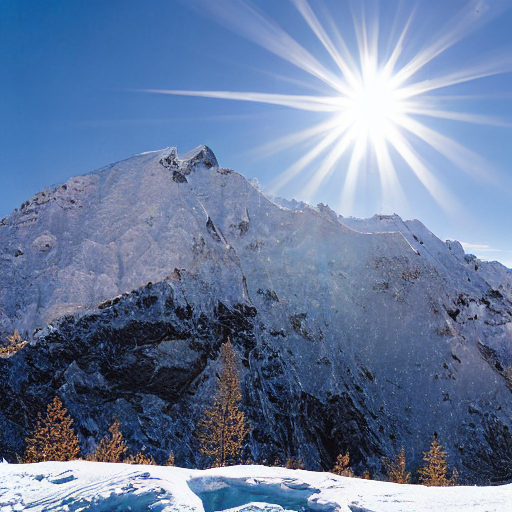

In [68]:
pipe(frames[0].prompts[0]).images[0]

In [32]:
import numpy as np
import scipy.io.wavfile as wavfile
import math
import librosa

def filter_data(audio_file_path, framerate, fn='1+x**4', format='disco'):
    # Load audio file
    # sample_rate, data = wavfile.read(audio_file_path)
    raw_data,sample_rate = librosa.load(audio_file_path, sr=None, mono=True)

    # # Average between channels. Take abs so we don't have phase issues (and we eventually want absolute value anyway, for volume).
    # def add_abs_array_elements(a, b):
    #     return np.abs(a) + np.abs(b)

    # channels = np.array([data[:, i] for i in range(data.shape[1])])
    # raw_data = np.apply_along_axis(add_abs_array_elements, 0, channels).mean(axis=0)
    
    samples = int(len(raw_data) / (sample_rate / framerate))+1
    block_size = int(len(raw_data) / samples)
    raw_data = raw_data/max(abs(raw_data))
    filtered_data = []
    for i in range(samples):
        chunk = abs(raw_data[i * block_size:(i + 1) * block_size - 1])
        # chunk=chunk/max(chunk)
        filtered_data.append(np.mean(chunk))
    
    # Normalize
    max_val = max(filtered_data)
    filtered_data = [x / max_val for x in filtered_data]

    # Evaluate expression for each point in filtered data
    filtered_data = [round(eval(fn.replace("x", str(x)).replace("y", str(ind))),2) for ind, x in enumerate(filtered_data)]

    # Format output based on selected format
    if format == "disco":
        output = filtered_data
    elif format == "csv":
        output = "\n".join([str(x) for x in filtered_data])

    return output

In [33]:
l=filter_data('../resources/tmp/htdemucs_ft/tas_peur/drums.wav', 15, '1+x*(3**2)', 'disco')
output=""
for i in range(len(l)):
    output+=f"{i}:({l[i]}), "
print(output[:-2])

0:(1.0), 1:(1.0), 2:(1.0), 3:(1.0), 4:(1.0), 5:(1.0), 6:(1.0), 7:(1.0), 8:(1.0), 9:(1.0), 10:(1.0), 11:(1.0), 12:(1.0), 13:(1.0), 14:(1.0), 15:(1.0), 16:(1.0), 17:(1.0), 18:(1.0), 19:(1.0), 20:(1.0), 21:(1.0), 22:(1.0), 23:(1.0), 24:(1.0), 25:(1.0), 26:(1.0), 27:(1.0), 28:(1.0), 29:(1.0), 30:(1.0), 31:(1.0), 32:(1.0), 33:(1.0), 34:(1.0), 35:(1.0), 36:(1.0), 37:(1.0), 38:(1.0), 39:(1.0), 40:(1.0), 41:(1.0), 42:(1.0), 43:(1.0), 44:(1.0), 45:(1.0), 46:(1.0), 47:(1.0), 48:(1.0), 49:(1.0), 50:(1.0), 51:(1.0), 52:(1.0), 53:(1.0), 54:(1.0), 55:(1.0), 56:(1.0), 57:(1.0), 58:(1.0), 59:(1.0), 60:(1.0), 61:(1.0), 62:(1.0), 63:(1.0), 64:(1.0), 65:(1.0), 66:(1.0), 67:(1.0), 68:(1.0), 69:(1.0), 70:(1.0), 71:(1.0), 72:(1.0), 73:(1.0), 74:(1.0), 75:(1.0), 76:(1.0), 77:(1.0), 78:(1.0), 79:(1.0), 80:(1.0), 81:(1.0), 82:(1.0), 83:(1.0), 84:(1.0), 85:(1.0), 86:(1.0), 87:(1.0), 88:(1.0), 89:(1.0), 90:(1.0), 91:(1.0), 92:(1.0), 93:(1.0), 94:(1.0), 95:(1.0), 96:(1.0), 97:(1.0), 98:(1.0), 99:(1.0), 100:(1.0),